In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib notebook


## Reduce memory usage. Source :https://www.kaggle.com/tunguz/eloda-with-feature-engineering-and-stacking

In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv("sample_submission.csv")

In [4]:
train=reduce_mem_usage(train)
test=reduce_mem_usage(test)

Mem. usage decreased to  4.04 Mb (56.2% reduction)
Mem. usage decreased to  2.24 Mb (52.5% reduction)


In [5]:
history=pd.read_csv('/Users/nus/Desktop/ELO/historical_transactions.csv')

In [6]:
history=reduce_mem_usage(history)

Mem. usage decreased to 1749.11 Mb (43.7% reduction)


In [11]:
history.purchase_date=pd.to_datetime(history.purchase_date)

In [12]:
history=reduce_mem_usage(history)

Mem. usage decreased to 1749.11 Mb (0.0% reduction)


In [13]:
gh=history.groupby('card_id')

In [24]:
history[history.card_id==history.card_id[0]].purchase_date.max()

Timestamp('2018-02-28 17:00:08')

In [25]:
=gh.max().purchase_date

card_id
C_ID_00007093c1   2018-02-27 05:14:57
C_ID_0001238066   2018-02-27 16:18:59
C_ID_0001506ef0   2018-02-17 12:33:56
C_ID_0001793786   2017-10-31 20:20:18
C_ID_000183fdda   2018-02-25 20:57:08
C_ID_00024e244b   2018-02-06 09:46:49
C_ID_0002709b5a   2018-02-19 14:50:38
C_ID_00027503e2   2018-01-19 12:07:27
C_ID_000298032a   2018-01-24 18:45:46
C_ID_0002ba3c2e   2017-10-29 11:35:16
C_ID_0002c7c2c1   2018-01-25 11:13:39
C_ID_00032df08f   2017-11-21 00:00:00
C_ID_0003754056   2017-12-20 07:42:42
C_ID_000377f6a0   2018-01-25 13:53:16
C_ID_0003be3c83   2018-02-12 12:29:56
C_ID_0003f41435   2018-02-27 14:41:29
C_ID_00042d509c   2017-12-25 13:18:50
C_ID_0004587331   2018-01-27 14:45:31
C_ID_0004725b87   2018-01-13 11:13:08
C_ID_0004888ddd   2018-01-31 07:29:38
C_ID_0004b68c49   2017-12-30 19:34:54
C_ID_0004c2a5ab   2018-02-20 14:34:19
C_ID_00057b99fe   2018-02-11 11:17:38
C_ID_000599daf9   2018-02-27 08:35:50
C_ID_0005b2f279   2017-12-29 19:26:33
C_ID_0005b5804f   2018-01-23 15:36:25
C_ID

In [26]:
history.groupby('month_lag').mean()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-5a0d6b7ba4dc>", line 1, in <module>
    history.groupby('month_lag').mean()
  File "/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py", line 1037, in mean
    return self._cython_agg_general('mean', **kwargs)
  File "/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py", line 3281, in _cython_agg_general
    how, alt=alt, numeric_only=numeric_only)
  File "/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py", line 3311, in _cython_agg_blocks
    data, agg_axis = self._get_data_to_aggregate()
  File "/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py", line 4005, in _get_data_to_aggregate
    obj = self._obj_with_exclusions
  File "pandas/_libs/src/properties.pyx", line 34, in pandas._libs.lib.cache_readonly.__get__ (pandas/_libs/lib.

KeyboardInterrupt: 

In [21]:
import datetime
datetime.datetime.today()

datetime.datetime(2018, 12, 10, 14, 10, 17, 920710)

In [9]:
train.groupby('feature_1').std()

,feature_2,feature_3,target
feature_1,,,
1,0.815110,0.0,3.407253
2,0.679055,0.0,3.756245
3,0.817395,0.0,3.834465
4,0.759881,0.0,3.818131
5,0.489636,0.0,4.134459


<IPython.core.display.Javascript object>


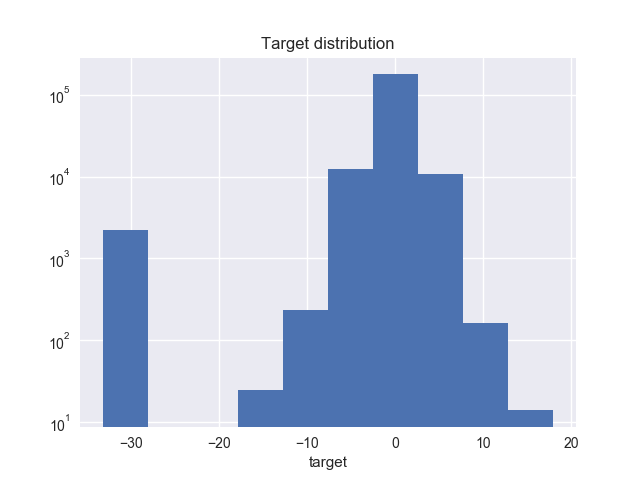

In [10]:
plt.figure()
train.target.hist()
plt.yscale('log')
plt.xlabel("target")
plt.title("Target distribution")
plt.show()
#plt.close()


## Let's check how target is dependent on features

#### Unique values in each feature

In [11]:

train.feature_1.unique(),train.feature_2.unique(),train.feature_3.unique()

(array([5, 4, 2, 1, 3]), array([2, 1, 3]), array([1, 0]))

<IPython.core.display.Javascript object>


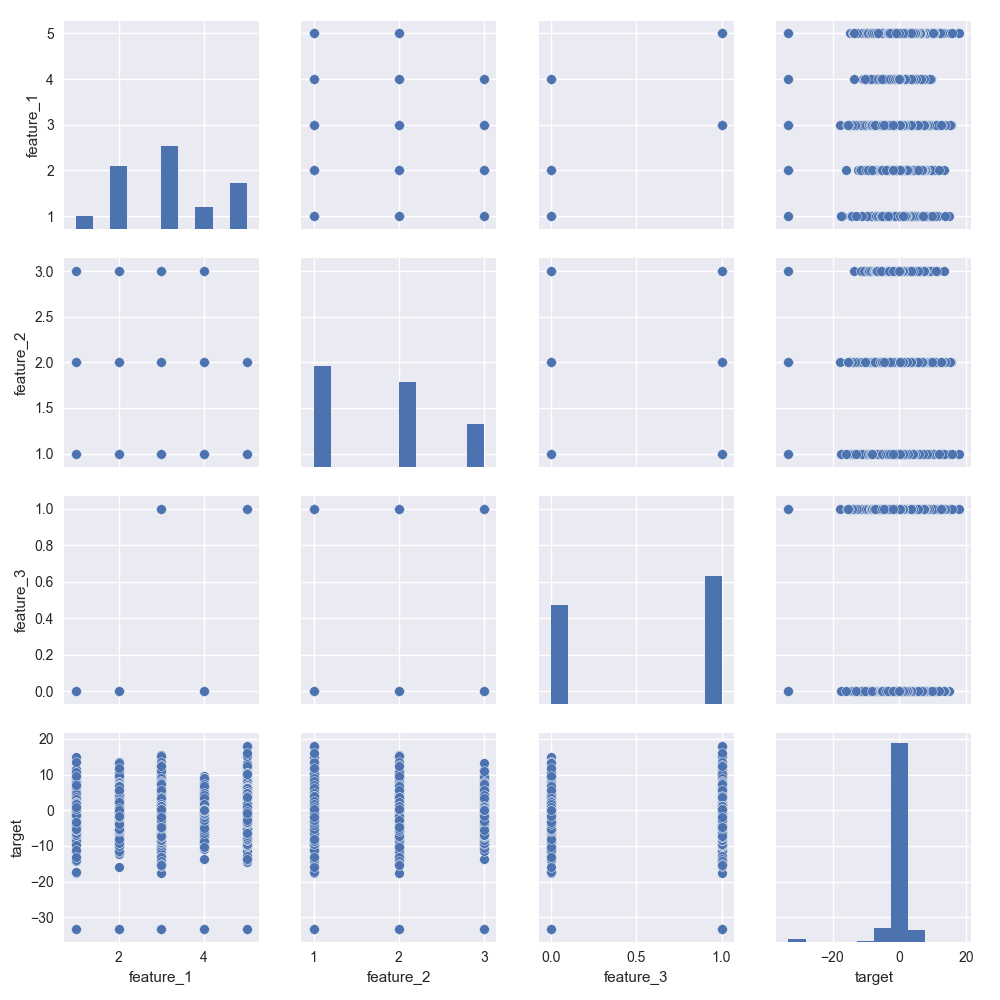

In [12]:
g = sns.pairplot(train)

<IPython.core.display.Javascript object>


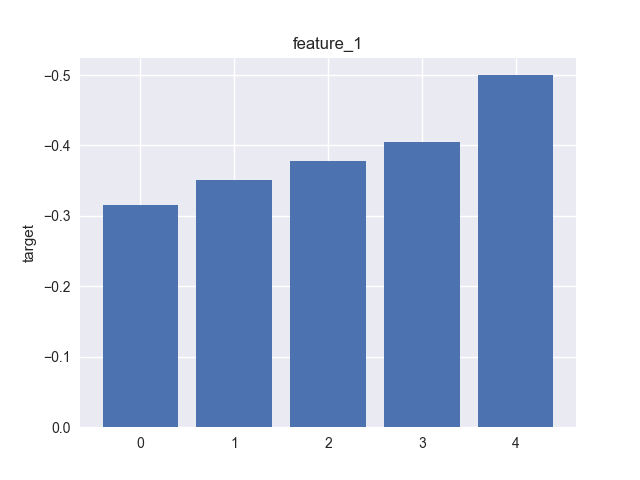

<IPython.core.display.Javascript object>


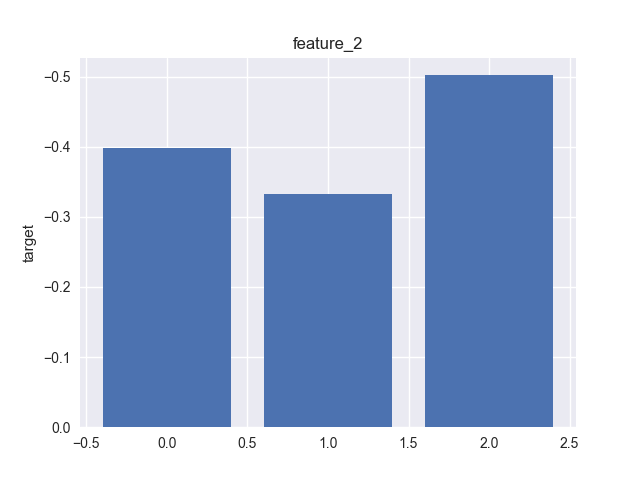

<IPython.core.display.Javascript object>


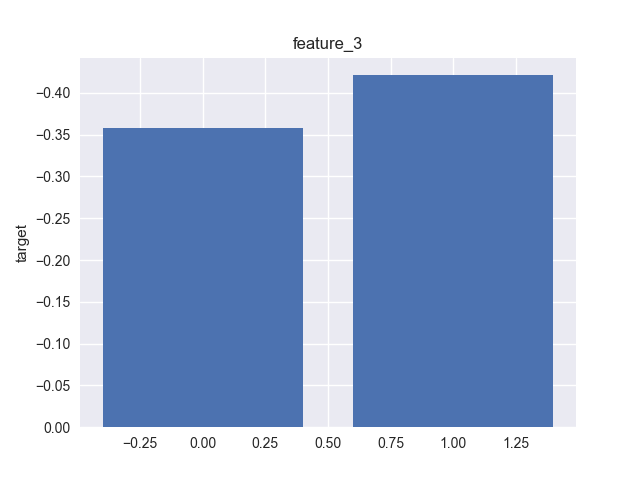

In [13]:
features=test.columns[2:]
for feature in features:
    plt.figure()
    x=[i for i in range(len(train.groupby(feature).mean()))]
    #error=train.groupby(feature).std().target
    plt.bar(x,train.groupby(feature).mean().target, align='center')
    plt.title(feature)
    plt.ylabel(train.columns[-1])
    plt.gca().invert_yaxis()
    plt.show()
#plt.close()

### Now let's check with standart deviation

<IPython.core.display.Javascript object>


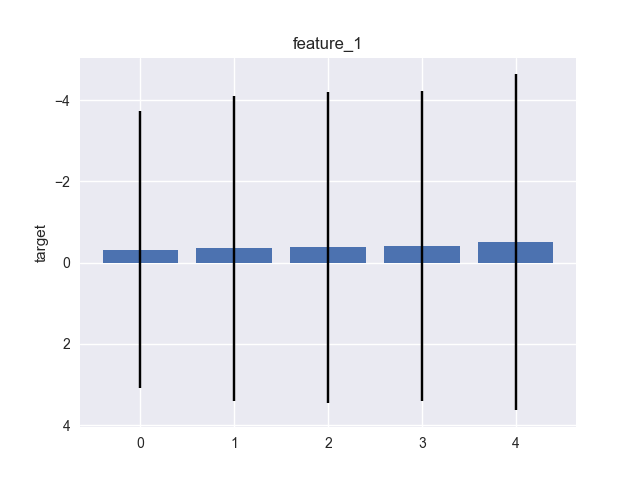

<IPython.core.display.Javascript object>


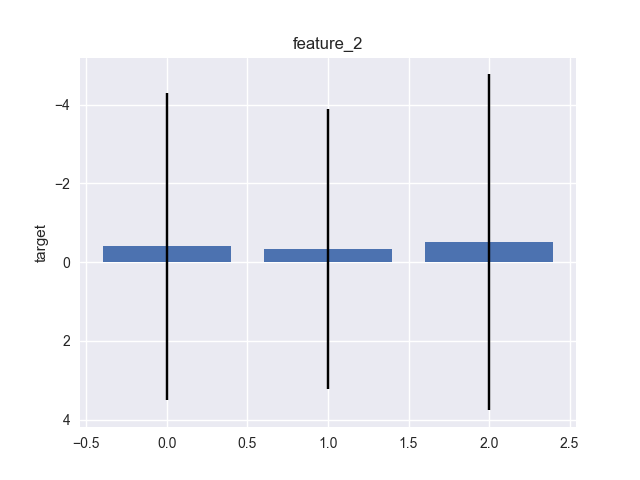

<IPython.core.display.Javascript object>


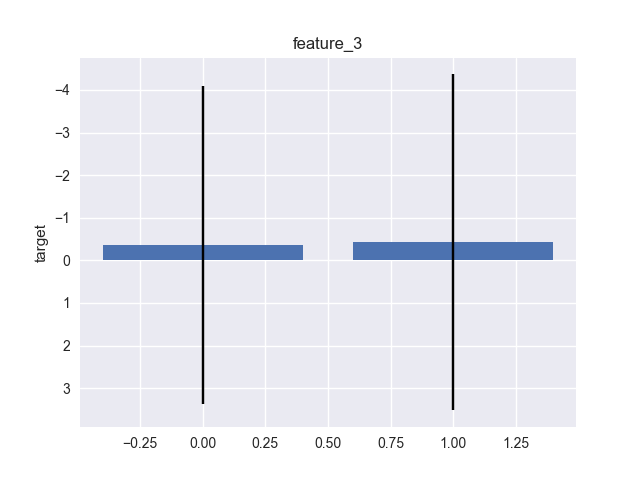

In [14]:

features=test.columns[2:]
for feature in features:
    plt.figure()
    features=train
    x=[i for i in range(len(train.groupby(feature).mean()))]
    error=train.groupby(feature).std().target
    plt.bar(x,train.groupby(feature).mean().target, yerr=error,align='center')
    plt.title(feature)
    plt.ylabel(train.columns[-1])
    plt.gca().invert_yaxis()
    plt.show()
    
#plt.close()

## Standart deviation is really high

## Let's do simple linear regression using features to estimate target

In [15]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Let's define error function

In [16]:
def rmse(y_pred,y_test):
    return np.sqrt(mean_squared_error(y_pred,y_test))

In [17]:
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:,2:-1], train.iloc[:,-1], test_size=0.20, random_state=42)

In [18]:
lgr=linear_model.LinearRegression()
lgr.fit(X_train,y_train)
y_pred_train=lgr.predict(X_train)
y_pred_test=lgr.predict(X_test)
print("RMSE of X_train:")
print(rmse(y_pred_train,y_train))
print("RMSE of X_test:")
print(rmse(y_pred_test,y_test))

RMSE of X_train:
3.8434843337426776
RMSE of X_test:
3.8755510011068295


In [19]:
# Coefficients of linear regression
lgr.coef_

array([-0.05187786, -0.04955213,  0.01413319])

### Let's make first benchmark submission

In [20]:
lgr.fit(train.iloc[:,2:-1],train.target)
y_pred_train=lgr.predict(train.iloc[:,2:-1])
y_pred_test=lgr.predict(test.iloc[:,2:])
print("RMSE of train:")
print(rmse(y_pred_train,train.target))



RMSE of train:
3.8499156810077317


/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


In [21]:
#Save to csv:
def save_csv(name,y_pred_test):
    ans=pd.DataFrame({'target':y_pred_test,'card_id':test.card_id})
    ans=ans[['card_id','target']]
    ans.to_csv(name,index=False)
    print("file saved: first five rows")
    return ans.head()             

In [22]:
save_csv('trail.csv',y_pred_test)

file saved: first five rows


,card_id,target
0,C_ID_0ab67a22ab,-0.435911
1,C_ID_130fd0cbdd,-0.398099
2,C_ID_b709037bc5,-0.455981
3,C_ID_d27d835a9f,-0.310608
4,C_ID_2b5e3df5c2,-0.455981


In [23]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

### Let's look at 'first_active_month' and see if there is any correlation. Let's seperate year and month

In [24]:
train_dt=train.copy()
test_dt=test.copy()

train_dt.first_active_month=pd.to_datetime(train.first_active_month)
test_dt.first_active_month=pd.to_datetime(test.first_active_month)

train_dt['year']=train_dt.first_active_month.dt.year
test_dt['year']=test_dt.first_active_month.dt.year

train_dt['month']=train_dt.first_active_month.dt.month
test_dt['month']=test_dt.first_active_month.dt.month

### Plotting month and year versus target

<IPython.core.display.Javascript object>


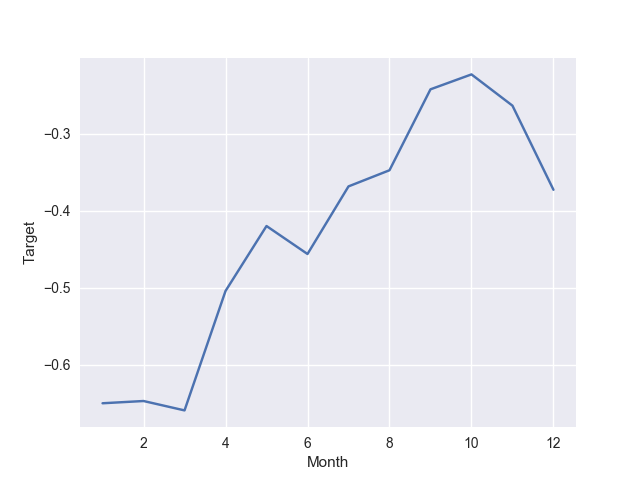

<IPython.core.display.Javascript object>


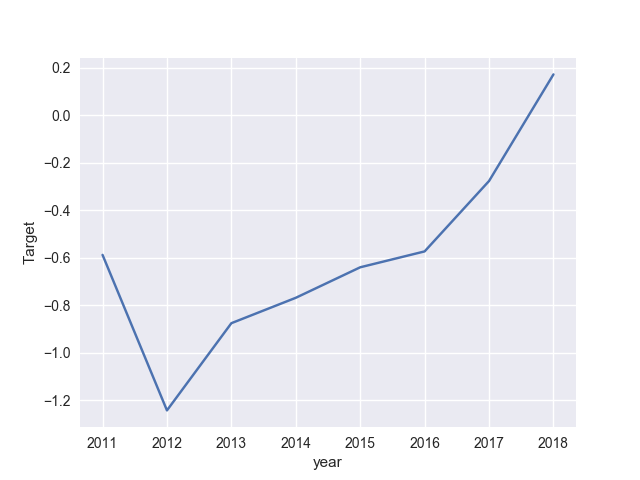

In [25]:
plt.figure()
plt.plot(train_dt.groupby('month').mean().index,train_dt.groupby('month').mean().target)
plt.xlabel("Month")
plt.ylabel("Target")
plt.show()

plt.figure()
plt.plot(train_dt.groupby('year').mean().index,train_dt.groupby('year').mean().target)
plt.xlabel("year")
plt.ylabel("Target")
plt.show()

### Now let's plot with error bars with deviation. It seems variance is very large

<IPython.core.display.Javascript object>


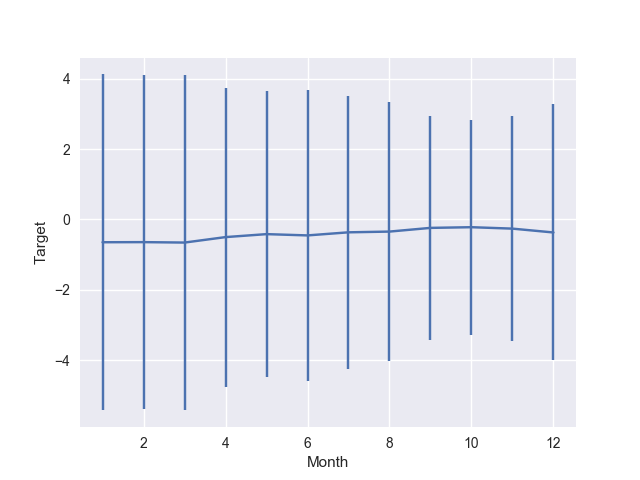

<IPython.core.display.Javascript object>


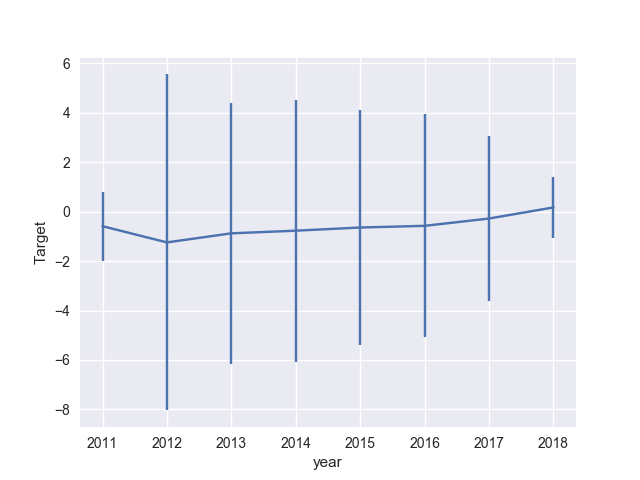

In [26]:
plt.figure()
err_month=train_dt.groupby('month').std().target
plt.errorbar(train_dt.groupby('month').mean().index,train_dt.groupby('month').mean().target,yerr=err_month)
plt.xlabel("Month")
plt.ylabel("Target")
plt.show()

plt.figure()
err_year=train_dt.groupby('year').std().target
plt.errorbar(train_dt.groupby('year').mean().index,train_dt.groupby('year').mean().target,yerr=err_year)
plt.xlabel("year")
plt.ylabel("Target")
plt.show()

### Let's try to use month and year for our linear regression. First, we have convert it to one hot encoding which can be done by get_dummies pandas function.

In [27]:
train_month=pd.get_dummies(train_dt.month)
train_year=pd.get_dummies(train_dt.year)

test_month=pd.get_dummies(test_dt.month)
test_year=pd.get_dummies(test_dt.year)

In [28]:
train_one_hot=pd.concat([train_dt,train_month,train_year],axis=1)
test_one_hot=pd.concat([test_dt,test_month,test_year],axis=1)

#drop unnesesary columns for train data
train_one_hot=train_one_hot.drop(['year','month','card_id','first_active_month','target'],axis=1)
#drop unnesesary columns for test data
test_one_hot=test_one_hot.drop(['year','month','card_id','first_active_month'],axis=1)




In [29]:
lgr.fit(train_one_hot,train.target)
y_pred_train=lgr.predict(train_one_hot)
y_pred_test=lgr.predict(test_one_hot)
print("RMSE of train:")
print(rmse(y_pred_train,train.target))
print("RMSE without dates: ")
print("3.849965430724074")

/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


RMSE of train:
3.8434689565898985
RMSE without dates: 
3.849965430724074


### Very small improvement in overall performance. Linear regression coefficients seems to be very small 

In [30]:
lgr.coef_

array([-3.86030966e-02,  1.02504708e-03,  6.31329801e-02, -1.65324188e+10,
       -1.65324188e+10, -1.65324188e+10, -1.65324188e+10, -1.65324188e+10,
       -1.65324188e+10, -1.65324188e+10, -1.65324188e+10, -1.65324188e+10,
       -1.65324188e+10, -1.65324188e+10, -1.65324188e+10, -5.56848071e+10,
       -5.56848071e+10, -5.56848071e+10, -5.56848071e+10, -5.56848071e+10,
       -5.56848071e+10, -5.56848071e+10, -5.56848071e+10])

In [31]:
#uncomment to save the file
#save_csv('trail2_date.csv',y_pred_test)

## Now let's move on historical data

In [32]:
!ls '/Users/nus/Desktop/ELO'

Data_Dictionary.xlsx          sample_submission.csv
historical_transactions.csv   test.csv
merchants.csv                 train.csv
new_merchant_transactions.csv


In [33]:
history=pd.read_csv('/Users/nus/Desktop/ELO/historical_transactions.csv')

In [34]:
history=reduce_mem_usage(history)

Mem. usage decreased to 1749.11 Mb (43.7% reduction)


### Number of historical transaction of  each client

In [51]:
hgb = history.groupby("card_id")
hgb = hgb["purchase_amount"].size().reset_index()
hgb.columns = ["card_id", "num_hist_transactions"]

train_h = pd.merge(train.iloc[:,:-1], hgb, on="card_id", how="left")
test_h = pd.merge(test, hgb, on="card_id", how="left")
train_h['target']=train.target

<IPython.core.display.Javascript object>


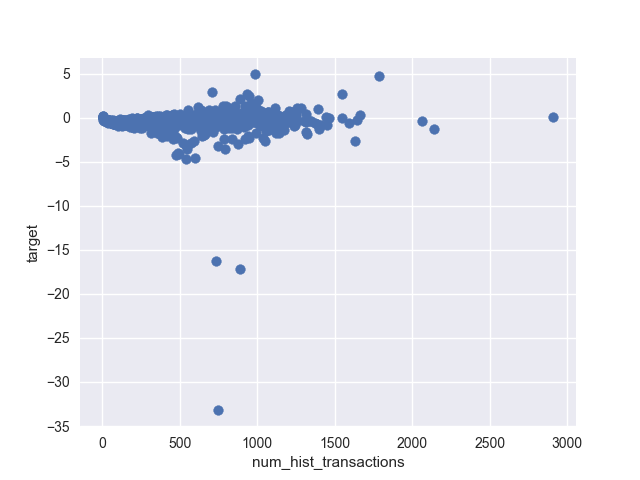

In [52]:
plt.figure()
plt.scatter(train_h.groupby('num_hist_transactions').mean().index,train_h.groupby('num_hist_transactions').mean().target)
plt.ylabel('target')
plt.xlabel('num_hist_transactions')

<IPython.core.display.Javascript object>


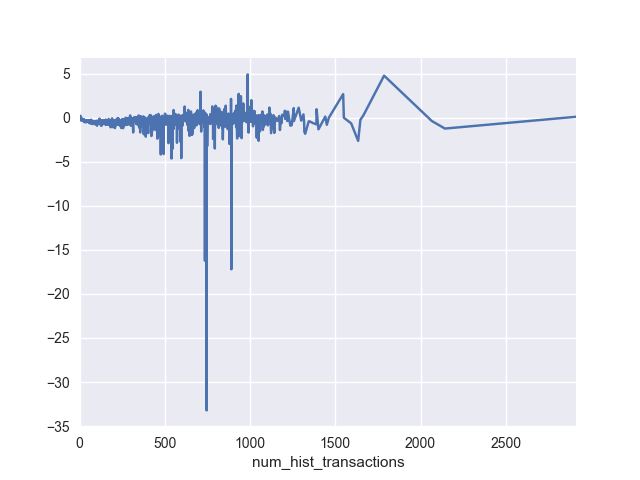

In [53]:
plt.figure()
train_h.groupby('num_hist_transactions').mean().target.plot()
#plt.xscale('log')
#plt.yscale('log')

In [54]:
train_h.groupby('num_hist_transactions').mean().index

Int64Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            1546, 1550, 1593, 1634, 1647, 1665, 1786, 2066, 2143, 2912],
           dtype='int64', name='num_hist_transactions', length=1023)

### Let's use bins to visualize. Seaborn boxplot can be used

<IPython.core.display.Javascript object>


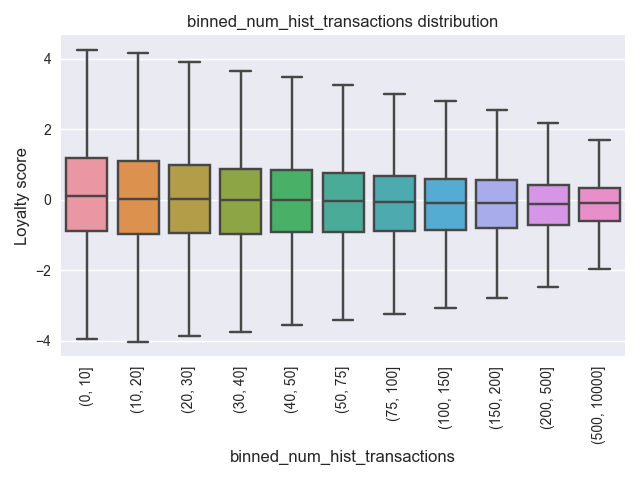

In [55]:
plt.figure()
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 10000]
train_h['binned_num_hist_transactions'] = pd.cut(train_h['num_hist_transactions'], bins)
cnt_srs = train_h.groupby("binned_num_hist_transactions").mean().target

#plt.figure(figsize=(12,8))
sns.boxplot(x="binned_num_hist_transactions", y='target', data=train_h, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned_num_hist_transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("binned_num_hist_transactions distribution")
plt.show()
plt.tight_layout()

### Let's look at purchase amount

In [56]:
gdf = history.groupby("card_id")
gdf = gdf["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
gdf.columns = ["card_id", "sum_hist_trans", "mean_hist_trans", "std_hist_trans", "min_hist_trans", "max_hist_trans"]
train_h = pd.merge(train_h, gdf, on="card_id", how="left")
test_h = pd.merge(test_h, gdf, on="card_id", how="left")

<IPython.core.display.Javascript object>


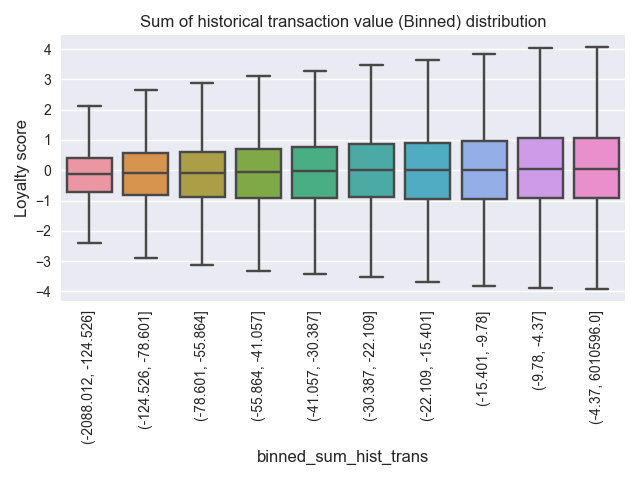

In [57]:
# make categorical features using percentile
bins = np.percentile(train_h["sum_hist_trans"], range(0,101,10))
train_h['binned_sum_hist_trans'] = pd.cut(train_h['sum_hist_trans'], bins)
#cnt_srs = train_df.groupby("binned_sum_hist_trans")[target_col].mean()

plt.figure()
sns.boxplot(x="binned_sum_hist_trans", y='target', data=train_h, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned_sum_hist_trans', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Sum of historical transaction value (Binned) distribution")
plt.show()
plt.tight_layout()

### Mean transaction dependance 

<IPython.core.display.Javascript object>


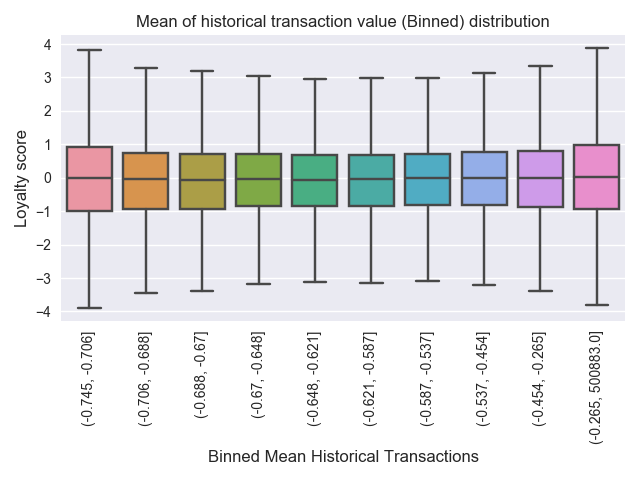

In [58]:
bins = np.percentile(train_h["mean_hist_trans"], range(0,101,10))
train_h['binned_mean_hist_trans'] = pd.cut(train_h['mean_hist_trans'], bins)
#cnt_srs = train_df.groupby("binned_mean_hist_trans")[target_col].mean()

plt.figure()
sns.boxplot(x="binned_mean_hist_trans", y='target', data=train_h, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('Binned Mean Historical Transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Mean of historical transaction value (Binned) distribution")
plt.tight_layout()
plt.show()

## Let's do the same for new merchant transaction

In [59]:
new_merchant=pd.read_csv('/Users/nus/Desktop/ELO/new_merchant_transactions.csv')

In [44]:
new_merchant=reduce_mem_usage(new_merchant)

Mem. usage decreased to 114.20 Mb (45.5% reduction)


In [60]:
nm = new_merchant.groupby("card_id")
nm = nm["purchase_amount"].size().reset_index()
nm.columns = ["card_id", "num_new_transactions"]

train_h = pd.merge(train_h, nm, on="card_id", how="left")
test_h = pd.merge(test_h, nm, on="card_id", how="left")

### There will be NaN values since not all customers have new purchases. Actually, we can convert NaN values to 0, since NaN means that customer didn't do any new purchases

In [61]:
# NaN values in historical transactions
print("Number of NaN values in historical purchases in train data")
print(train_h.num_hist_transactions.isnull().sum())
print("Number of NaN values in historical purchases in train data")
print(test_h.num_hist_transactions.isnull().sum())

Number of NaN values in historical purchases in train data
0
Number of NaN values in historical purchases in train data
0


In [62]:
# There will be NaN values 
print("Number of NaN values in new purchases in train data")
print(train_h['num_new_transactions'].isnull().sum())

print("Number of NaN values in new purchases in test data")
print(test_h['num_new_transactions'].isnull().sum())



Number of NaN values in new purchases in train data
21931
Number of NaN values in new purchases in test data
13608


### Convert NaN values to zero

In [63]:
def convert(x):
    if np.isnan(x):
        x=0
    return x
train_h.num_new_transactions=train_h.num_new_transactions.apply(convert)


<IPython.core.display.Javascript object>


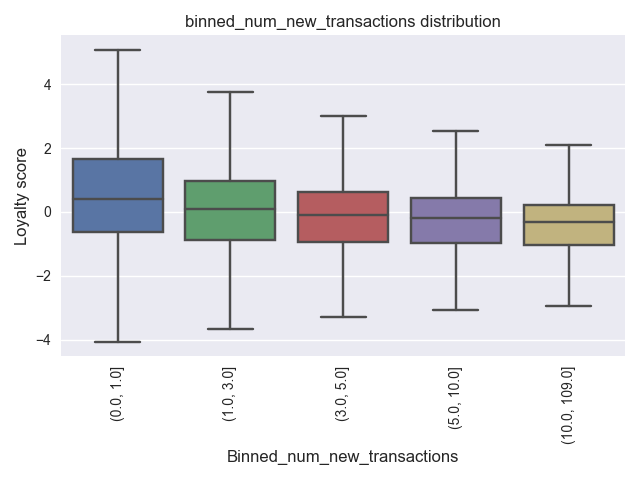

In [64]:
plt.figure()
bins = np.percentile(train_h['num_new_transactions'],range(0,101,20))
train_h['bin_num_new_transactions'] = pd.cut(train_h['num_new_transactions'], bins)
#cnt_srs = train_h.groupby("num_new_transactions").mean().target

#plt.figure(figsize=(12,8))
sns.boxplot(x="bin_num_new_transactions", y='target', data=train_h, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('Binned_num_new_transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("binned_num_new_transactions distribution")
plt.show()
plt.tight_layout()

### Now let's check by amount new transactions

In [65]:
gdf = new_merchant.groupby("card_id")
gdf = gdf["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
gdf.columns = ["card_id", "sum_new_trans", "mean_new_trans", "std_new_trans", "min_new_trans", "max_new_trans"]
train_h = pd.merge(train_h, gdf, on="card_id", how="left")
test_h = pd.merge(test_h, gdf, on="card_id", how="left")

### Now let's convert NaN values to zero since NaN values will appear when no new purchases were made. Also, NaN values will appear in std_new_trans (standart deviation). I will change it to zero as well since there is no variance ( I am not sure if it right thing to do)

In [66]:
gdf.columns[1:]

Index(['sum_new_trans', 'mean_new_trans', 'std_new_trans', 'min_new_trans',
       'max_new_trans'],
      dtype='object')

In [67]:
train_h[gdf.columns[1:]].isnull().sum()

sum_new_trans     21931
mean_new_trans    21931
std_new_trans     48718
min_new_trans     21931
max_new_trans     21931
dtype: int64

In [68]:
train_h[gdf.columns[1:]]=train_h[gdf.columns[1:]].fillna(0)
test_h[gdf.columns[1:]]=test_h[gdf.columns[1:]].fillna(0)

In [69]:
train_h[gdf.columns[1:]].isnull().sum()

sum_new_trans     0
mean_new_trans    0
std_new_trans     0
min_new_trans     0
max_new_trans     0
dtype: int64

In [70]:
test_h[gdf.columns[1:]].isnull().sum()

sum_new_trans     0
mean_new_trans    0
std_new_trans     0
min_new_trans     0
max_new_trans     0
dtype: int64

### Let's plot sum_new_transaction dependence 

<IPython.core.display.Javascript object>


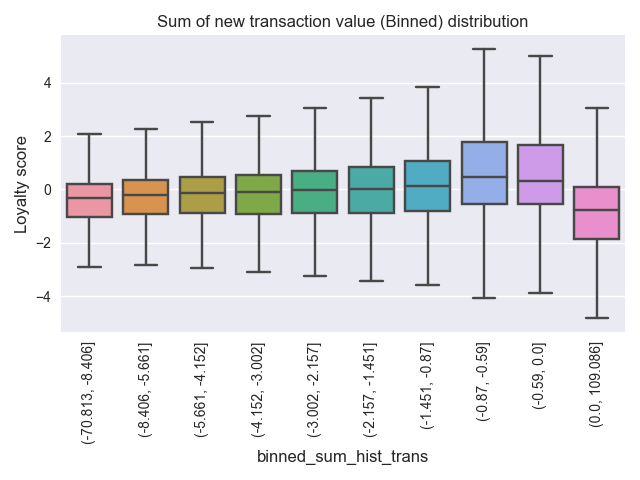

In [71]:
# make categorical features using percentile
bins = np.percentile(train_h["sum_new_trans"], range(0,101,10))
train_h['binned_sum_new_trans'] = pd.cut(train_h['sum_new_trans'], bins)
#cnt_srs = train_df.groupby("binned_sum_hist_trans")[target_col].mean()
plt.figure()
sns.boxplot(x="binned_sum_new_trans", y='target', data=train_h, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned_sum_hist_trans', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Sum of new transaction value (Binned) distribution")
plt.show()
plt.tight_layout()

### Mean transaction dependance 

<IPython.core.display.Javascript object>


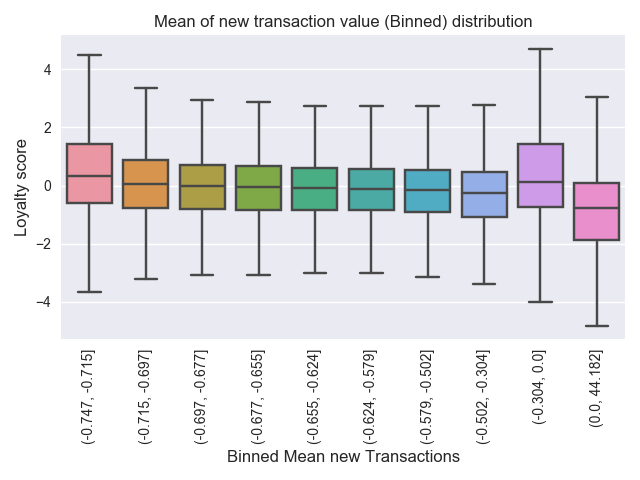

In [72]:
bins = np.percentile(train_h["mean_new_trans"], range(0,101,10))
train_h['binned_mean_new_trans'] = pd.cut(train_h['mean_new_trans'], bins)
#cnt_srs = train_df.groupby("binned_mean_hist_trans")[target_col].mean()

plt.figure()
sns.boxplot(x="binned_mean_new_trans", y='target', data=train_h, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('Binned Mean new Transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("Mean of new transaction value (Binned) distribution")
plt.tight_layout()
plt.show()

### Extract years and month

In [73]:
train_h["first_active_month"]=pd.to_datetime(train_h["first_active_month"])
test_h["first_active_month"]=pd.to_datetime(test_h["first_active_month"])

train_h["year"]=train_h["first_active_month"].dt.year
train_h["month"]=train_h["first_active_month"].dt.month

test_h["year"]=test_h["first_active_month"].dt.year
test_h["month"]=test_h["first_active_month"].dt.month

### Baseline gradient boosted model

In [74]:
train_col=['feature_1', 'feature_2', 'feature_3',
       'num_hist_transactions', 'sum_hist_trans', 'mean_hist_trans',
       'std_hist_trans', 'min_hist_trans', 'max_hist_trans', 'year',
       'month','sum_new_trans', 'mean_new_trans',
       'std_new_trans', 'min_new_trans', 'max_new_trans']

In [75]:
from xgboost.sklearn import XGBRegressor

In [76]:
xgb=XGBRegressor()

In [77]:
xgb.fit(train_h[train_col],train_h.target)
y_pred_xgb=xgb.predict(train_h[train_col])
print("RMSE of train with xgboost")
print(rmse(y_pred_xgb,train.target))

lgr.fit(train_h[train_col],train_h.target)
y_pred_lgr=lgr.predict(train_h[train_col])
print("RMSE of train with linear regression")
print(rmse(y_pred_lgr,train.target))

RMSE of train with xgboost
3.7939606


/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


RMSE of train with linear regression
3.830777178838469


/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


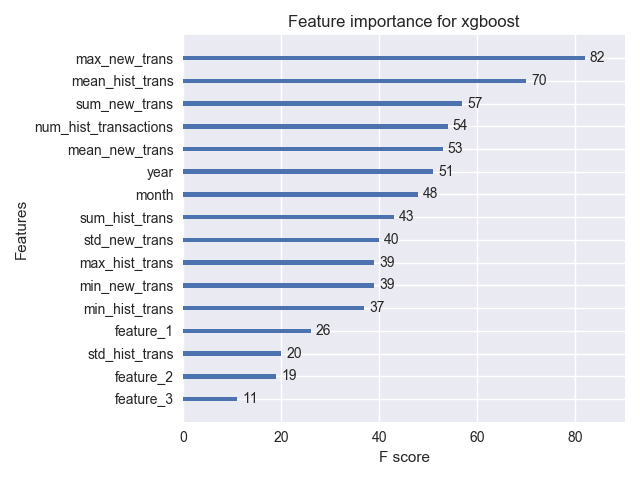

In [78]:
from xgboost import plot_importance
plot_importance(xgb)
plt.tight_layout()
plt.title("Feature importance for xgboost")

In [79]:
y_pred=xgb.predict(test_h[train_col])
save_csv("xgboost_hist_new.csv",y_pred)

file saved: first five rows


,card_id,target
0,C_ID_0ab67a22ab,-0.653398
1,C_ID_130fd0cbdd,-0.912387
2,C_ID_b709037bc5,-0.861912
3,C_ID_d27d835a9f,-0.203817
4,C_ID_2b5e3df5c2,-1.332562


### Year and month is actually category let's change it to one hot matrix

In [80]:
train_hd=pd.concat([train_h,train_year,train_month],axis=1)
test_hd=pd.concat([test_h,test_year,test_month],axis=1)

In [81]:
train_col.remove('year')
train_col.remove('month')

In [82]:
train_col_one=train_col+list(train_hd.columns[-20::])

In [83]:
print(train_col_one)

['feature_1', 'feature_2', 'feature_3', 'num_hist_transactions', 'sum_hist_trans', 'mean_hist_trans', 'std_hist_trans', 'min_hist_trans', 'max_hist_trans', 'sum_new_trans', 'mean_new_trans', 'std_new_trans', 'min_new_trans', 'max_new_trans', 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [84]:
xgb.fit(train_hd[train_col_one],train_h.target)
y_pred_xgb=xgb.predict(train_hd[train_col_one])
print("RMSE of train with xgboost")
print(rmse(y_pred_xgb,train.target))

lgr.fit(train_hd[train_col_one],train_hd.target)
y_pred_lgr=lgr.predict(train_hd[train_col_one])
print("RMSE of train with linear regression")
print(rmse(y_pred_lgr,train.target))

RMSE of train with xgboost
3.79583


/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


RMSE of train with linear regression
3.8292904975109936
